# Часть 1. SQL/PYTHON

<div style="border:solid black 2px; padding: 20px">

Работа с двумя таблицами.

Sales (1 строка это 1 чек):
* Date
* ID клиента
* ID заказа
* PCS (количество продаж в штуках)
* Net Sales (выручка без НДС в руб.)

Client:
* Name client
* Group
* Gender
* ID клиента

</div>

<div style="border:solid black 2px; padding: 20px">

## Загрузка данных.

</div>

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_1 = 'sales.xlsx' 
file_2 = 'client.xlsx' 
sales = pd.read_excel(file_1)
client = pd.read_excel(file_2)

In [3]:
sales.head(2)

,Date,ID клиента,ID заказа,PCS,Net Sales
0,2023-07-25,14.0,2290,1,1800
1,2023-08-03,19.0,2291,1,2900


In [4]:
client.head(2)

,Name client,Group,Gender,ID клиента
0,Ольга,"Лояльные, зарегистированы через интернет-магазин",Ж,14
1,Вера,Лояльные имеют карту Modis Club,Ж,15


<div style="border:solid black 2px; padding: 20px">

## Приведем названия столбцов к змеиному регистру.

</div>

In [5]:
sales.columns = [x.lower().replace(' ', '_') for x in sales.columns]
client.columns = [x.lower().replace(' ', '_') for x in client.columns]
sales = sales.rename(columns={'id_клиента': 'user_id', 'id_заказа': 'order_id'})
client = client.rename(columns={'id_клиента': 'user_id'})
print(sales.columns)
print(client.columns)

Index(['date', 'user_id', 'order_id', 'pcs', 'net_sales'], dtype='object')
Index(['name_client', 'group', 'gender', 'user_id'], dtype='object')


<div style="border:solid black 2px; padding: 20px">

## Проверка периода отчета.

</div>

In [6]:
print('Начало периода:', sales['date'].min())
print('Конец периода:', sales['date'].max())
print('Период:', sales['date'].max() - sales['date'].min())

Начало периода: 2023-07-25 00:00:00
Конец периода: 2024-10-13 00:00:00
Период: 446 days 00:00:00


In [7]:
# добавим дополнительные столбцы с периодами

sales['month'] = pd.to_datetime(sales['date']).dt.month
sales['year'] = pd.to_datetime(sales['date']).dt.year
sales['month_year'] = sales['date'].apply(lambda s: dt.date(s.year, s.month, 1))
sales.head(2)

,date,user_id,order_id,pcs,net_sales,month,year,month_year
0,2023-07-25,14.0,2290,1,1800,7,2023,2023-07-01
1,2023-08-03,19.0,2291,1,2900,8,2023,2023-08-01


<div style="border:solid black 2px; padding: 20px">

## Добавим столбец с НДС. Возьмем 13% (гипотетический НДС), так как представлен различный ассортимент товара, большинство из которого взрослая одежда.

</div>

In [8]:
sales['vat'] = 0.13
sales.head(2)

,date,user_id,order_id,pcs,net_sales,month,year,month_year,vat
0,2023-07-25,14.0,2290,1,1800,7,2023,2023-07-01,0.13
1,2023-08-03,19.0,2291,1,2900,8,2023,2023-08-01,0.13


<div style="border:solid black 2px; padding: 20px">

## Добавим столбец gross_sales выручка с НДС.

</div>

In [9]:
sales['gross_sales'] = sales['net_sales'] * (1 + sales['vat'])
sales.head(2)

,date,user_id,order_id,pcs,net_sales,month,year,month_year,vat,gross_sales
0,2023-07-25,14.0,2290,1,1800,7,2023,2023-07-01,0.13,2034.0
1,2023-08-03,19.0,2291,1,2900,8,2023,2023-08-01,0.13,3277.0


<div style="border:solid black 2px; padding: 20px">

## Добавим столбец средняя цена.

</div>

In [10]:
sales['avg_price'] = sales['gross_sales'] / sales['pcs']
sales.head()

,date,user_id,order_id,pcs,net_sales,month,year,month_year,vat,gross_sales,avg_price
0,2023-07-25,14.0,2290,1,1800,7,2023,2023-07-01,0.13,2034.0,2034.00
1,2023-08-03,19.0,2291,1,2900,8,2023,2023-08-01,0.13,3277.0,3277.00
2,2023-08-25,15.0,2292,1,1500,8,2023,2023-08-01,0.13,1695.0,1695.00
3,2023-09-02,33.0,2293,2,2230,9,2023,2023-09-01,0.13,2519.9,1259.95
4,2023-09-04,17.0,2294,1,1700,9,2023,2023-09-01,0.13,1921.0,1921.00


<div style="border:solid black 2px; padding: 20px">

## Показать динамику по месяцам среднего чека и средней цены.

</div>

In [11]:
sales_avg = sales.pivot_table(index='month_year', values=['gross_sales', 'avg_price']).round(0)\
                 .reset_index()\
                 .rename(columns= {'month_year': 'Месяц_год', 'avg_price': 'Средняя цена',
                                      'gross_sales': 'Средний чек'})
sales_avg

,Месяц_год,Средняя цена,Средний чек
0,2023-07-01,2034.0,2034.0
1,2023-08-01,2486.0,2486.0
2,2023-09-01,2024.0,2339.0
3,2023-10-01,1887.0,2582.0
4,2023-11-01,2090.0,2090.0
5,2023-12-01,1751.0,3503.0
6,2024-01-01,1552.0,3797.0
7,2024-02-01,1412.0,2825.0
8,2024-03-01,2426.0,3541.0
9,2024-04-01,1695.0,3390.0


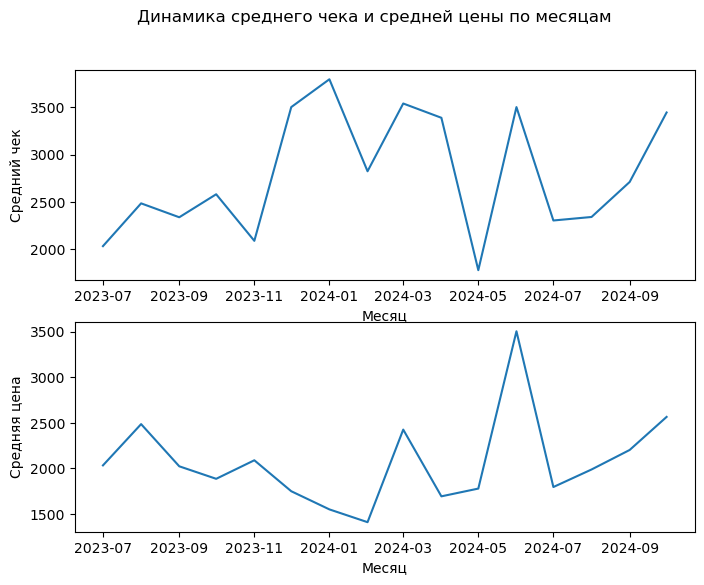

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

fig.suptitle('Динамика среднего чека и средней цены по месяцам')

sns.lineplot(ax=axes[0], data=sales_avg, x='Месяц_год', y='Средний чек')
sns.lineplot(ax=axes[1], data=sales_avg, x='Месяц_год', y='Средняя цена')
axes[0].set_xlabel('Месяц')
axes[1].set_xlabel('Месяц')
axes[0].set_ylabel('Средний чек')
axes[1].set_ylabel('Средняя цена')
plt.show()

<div style="border:solid green 2px; padding: 20px">

Самая высокая средняя цена 3503р. в июне 2024.

Самый высокий средний чек 3797р. в январе 2024.

</div>

<div style="border:solid black 2px; padding: 20px">

## Указать группу клиентов с наибольшой и наименьшей выручкой продаж за весь период.

</div>

In [13]:
# Объединим 2 датафрейма в 1 по столбцу user_id

data = sales.merge(client, how='left', on='user_id')
data['group'] = data['group'].fillna('Нелояльные')
data.head()

,date,user_id,order_id,pcs,net_sales,month,year,month_year,vat,gross_sales,avg_price,name_client,group,gender
0,2023-07-25,14.0,2290,1,1800,7,2023,2023-07-01,0.13,2034.0,2034.00,Ольга,"Лояльные, зарегистированы через интернет-магазин",Ж
1,2023-08-03,19.0,2291,1,2900,8,2023,2023-08-01,0.13,3277.0,3277.00,Илья,Лояльные не имеют карту Modis Club,М
2,2023-08-25,15.0,2292,1,1500,8,2023,2023-08-01,0.13,1695.0,1695.00,Вера,Лояльные имеют карту Modis Club,Ж
3,2023-09-02,33.0,2293,2,2230,9,2023,2023-09-01,0.13,2519.9,1259.95,Надежда,Лояльные имеют карту Modis Club,Ж
4,2023-09-04,17.0,2294,1,1700,9,2023,2023-09-01,0.13,1921.0,1921.00,Женя,Лояльные имеют карту Modis Club,Ж


In [14]:
# Замена орфографической ошибки

data['group'] = np.where(data['group'] == 'Лояльные, зарегистированы через интернет-магазин',
                         'Лояльные, зарегистрированы через интернет-магазин', data['group'])

In [15]:
group = data.pivot_table(index='group', values='net_sales', aggfunc='sum')\
            .sort_values(by='net_sales', ascending=False).reset_index()\
            .rename(columns= {'group': 'Группа', 'net_sales': 'Выручка без НДС в руб.'})
group

,Группа,Выручка без НДС в руб.
0,Лояльные имеют карту Modis Club,31130
1,Лояльные не имеют карту Modis Club,29000
2,Нелояльные,23800
3,"Лояльные, зарегистрированы через интернет-магазин",18520


<div style="border:solid green 2px; padding: 20px">

Группа клиентов с наибольшой выручкой за весь период: Лояльные имеют карту Modis Club 31130 руб. без НДС.

Группа клиентов с наименьшей выручкой за весь период: Лояльные, зарегистированы через интернет-магазин 18520 руб. без НДС.


</div>

<div style="border:solid black 2px; padding: 20px">

## Указать долю нелояльных клиентов от общего числа за весь период.

</div>

In [16]:
group['Доля'] = round((group['Выручка без НДС в руб.']
                       /group['Выручка без НДС в руб.'].sum()) * 100, 1)
group['Доля'] = group['Доля'].map('{:,.1f}%'.format)
group

,Группа,Выручка без НДС в руб.,Доля
0,Лояльные имеют карту Modis Club,31130,30.4%
1,Лояльные не имеют карту Modis Club,29000,28.3%
2,Нелояльные,23800,23.2%
3,"Лояльные, зарегистрированы через интернет-магазин",18520,18.1%


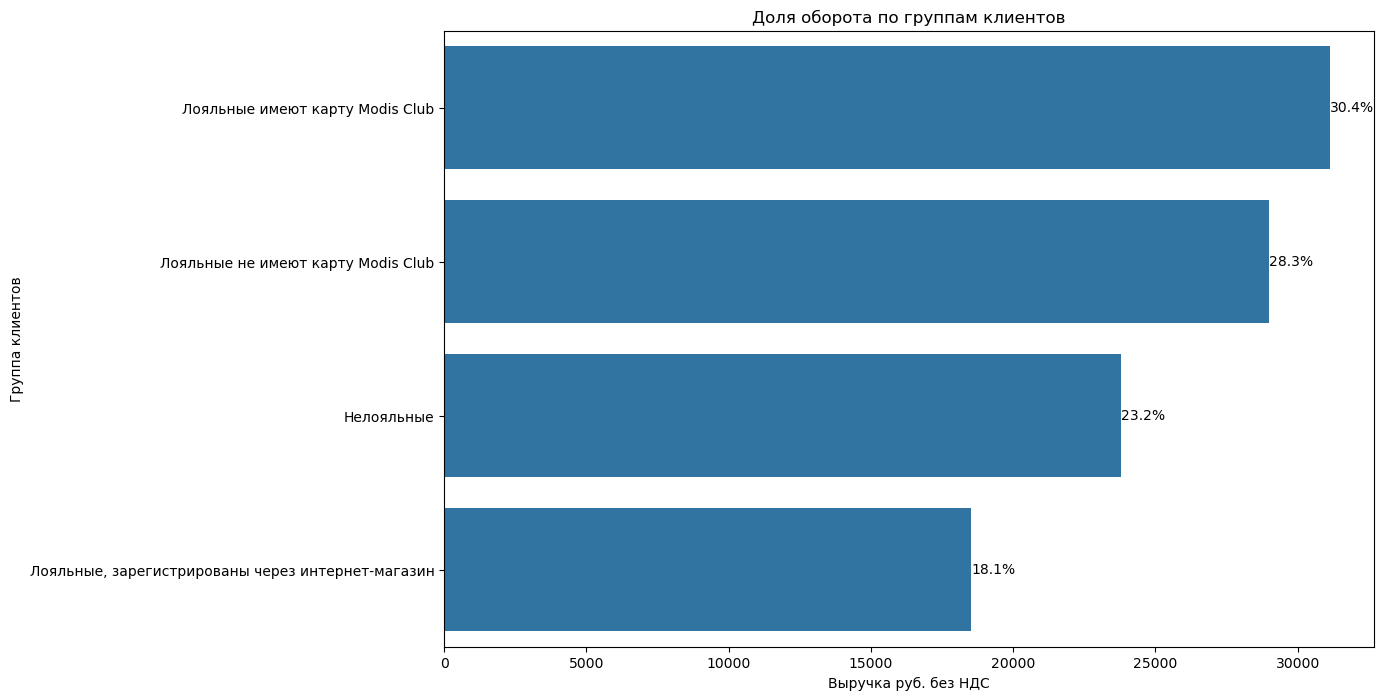

In [17]:
plt.figure(figsize=(12, 8))
label = ['30.4%', '28.3%', '23.2%', '18.1%']
ax = sns.barplot(data=group, x='Выручка без НДС в руб.', y='Группа', orient='h')

labels = (group['Доля'].round(1).astype(str)).values
ax.bar_label(ax.containers[0], labels = labels, fmt='%.1i', fontsize= 10)
ax.set_title('Доля оборота по группам клиентов')
ax.set_xlabel('Выручка руб. без НДС')
ax.set_ylabel('Группа клиентов')
plt.show()

<div style="border:solid green 2px; padding: 20px">

Доля нелояльных клиентов по обороту за весь период 23.2%.

</div>

<div style="border:solid black 2px; padding: 20px">

## Сравнить динамику продаж групп клиентов за август в 2024 году относительно 2023 года. Сделать вывод.

</div>

In [18]:
aug_sales= data.query('month == 8')\
               .pivot_table(index='month', columns='year', values='net_sales', aggfunc='sum')\
               .reset_index()
aug_sales['net_sales 2024 vs 2023'] = ((aug_sales[2024] / aug_sales[2023] - 1) * 100)\
                                        .round(1).map("{:,.1f}%".format)
aug_sales

year,month,2023,2024,net_sales 2024 vs 2023
0,8,4400,8290,88.4%


In [19]:
# сводная таблица по выручке
group_sales = data.query('month == 8').pivot_table(index='group', columns='year', values='net_sales', aggfunc='sum')\
                      .fillna(0).reset_index()
group_sales['net_sales 2024 vs 2023'] = ((group_sales[2024] / group_sales[2023] - 1) * 100)\
                                          .round(1).replace([np.inf, -np.inf], 0)\
                                          .map("{:,.1f}%".format)
group_sales.replace(to_replace='0.0%', value='', inplace=True)
display(group_sales.style.format({2023: '{:.0f}', 2024: '{:.0f}'})\
                   .set_caption('Выручка руб. без НДС август 2024 к 2023'))

# сводная таблица по продажам в штуках
group_pcs = data.query('month == 8').pivot_table(index='group', columns='year', values='pcs', aggfunc='sum')\
                      .fillna(0).reset_index()
group_pcs['order_cnt 2024 vs 2023'] = ((group_pcs[2024] / group_pcs[2023] - 1) * 100)\
                                          .round(1).replace([np.inf, -np.inf], 0)\
                                          .map("{:,.1f}%".format)
group_pcs.replace(to_replace='0.0%', value='', inplace=True)
display(group_pcs.style.format({2023: '{:.0f}', 2024: '{:.0f}'})\
                 .set_caption('Количество продаж в штуках август 2024 к 2023'))

# сводная таблица по средней цене
group_avg = data.query('month == 8').pivot_table(index='group', columns='year', values='avg_price', aggfunc='mean')\
                      .fillna(0).round(0).reset_index()
group_avg['order_cnt 2024 vs 2023'] = ((group_avg[2024] / group_avg[2023] - 1) * 100)\
                                          .round(1).replace([np.inf, -np.inf], 0)\
                                          .map("{:,.1f}%".format)
group_avg.replace(to_replace='0.0%', value='', inplace=True)
display(group_avg.style.format({2023: '{:.0f}', 2024: '{:.0f}'})\
                 .set_caption('Средняя цена август 2024 к 2023'))

year,group,2023,2024,net_sales 2024 vs 2023
0,Лояльные имеют карту Modis Club,1500,3200,113.3%
1,Лояльные не имеют карту Modis Club,2900,2590,-10.7%
2,"Лояльные, зарегистрированы через интернет-магазин",0,2500,


year,group,2023,2024,order_cnt 2024 vs 2023
0,Лояльные имеют карту Modis Club,1,2,100.0%
1,Лояльные не имеют карту Modis Club,1,1,
2,"Лояльные, зарегистрированы через интернет-магазин",0,2,


year,group,2023,2024,order_cnt 2024 vs 2023
0,Лояльные имеют карту Modis Club,1695,1808,6.7%
1,Лояльные не имеют карту Modis Club,3277,2927,-10.7%
2,"Лояльные, зарегистрированы через интернет-магазин",0,1412,


<div style="border:solid green 2px; padding: 20px">

Прирост выручки руб. август 2024 к 2023 88.4%.

По группам (август 2024 к 2023):
* Лояльные имеют карту Modis Club. Выручка год к году выросла в 2 раза, рост за счет увеличения продаж в штуках.
* Лояльные не имеют карту Modis Club. Падение выручки на 10.7%, продажи в штуках на уровне прошлого года, на падение выручки повлияло снижение средней цены.
* Лояльные, зарегистрированы через интернет-магазин. В 2023 г. не было продаж в августе у данной группы.

</div>